<a href="https://colab.research.google.com/github/Shrutiba/iisc_cds/blob/main/M8_AST_07_Modern_Portfolio_Theory_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 7: Modern Portfolio Theory

## Learning Objectives

At the end of the experiment, you will be able to

* understand what is portfolio
* compute expected return of a portfolio
* compute covariance of returns
* understand efficient frontier plots
* compute portfolio weights for minimum variance and tangency portfolios

## Information

**Portfolio**

A portfolio is a collection or group of assets that are put together usually for some investment objective and also to satisfy a level of risk. The type of assets that can be fit into a portfolio includes stocks, bonds, currencies, and cash-like equivalence. It has been widely used in all areas of finance, but modern portfolio theory has also been extended to realms outside of finance, for example, people have used it to study the allocation of environmental resources in the best way possible.

There are two underlying assumptions or objectives of **modern portfolio theory**.

* One is to maximize the expected returns based on a given level of risk. So, some assets are risky, and we can win big or lose big, but we are trying to maximize our expected returns with a set of underlying assets, and then secondly,

* the theory emphasizes that there is an inherent risk in the part of higher returns. So, if we want big returns, there's a lot more risk, and we can lose a lot more money.

In conclusion, modern portfolio theory is an attempt to investigate or analyze the interrelationships between these different investments, trying to maximize the expected returns, and minimize the risk.

To know more about modern portfolio theory, click [here](https://cdn.exec.talentsprint.com/static/cds/content/PortfolioTheoryFabozziandGrant.pdf).

### Expected return

The expected return of one security is the amount of profit or loss an investor can make or anticipate on an investment, given the historical returns. Note that this part of the theory does not take into account risk. So to calculate the expected return of a security we take the log difference.

Now that we have calculated the expected return of an individual security, let's look at how we calculate the expected returns for a portfolio of investments. So, the expected return for a portfolio investment is the weighted average of the expected returns of each of the components. The weight of a security is the ratio of the investment in the security to the total investment of the portfolio.

The formula for the expected return on a portfolio is given by:

$$E(r) = (w_a * r_a) + (w_b * r_b)$$

where, $w$ is the weight of a security and

$r$ is the return of the security.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2417774" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886610342" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M8_AST_07_Modern_Portfolio_Theory_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")

Setup completed successfully


### Import required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt

**Example 1:** Let us consider an investment in a two asset portfolio.

* Asset A - 12% return with 20% standard deviation
* Asset B - 16% return with 35% standard deviation

Given 10000, let us invest 6000 in Asset A and 4000 in Asset B.

Calculate the expected return.

The expected return is calculated as follows:

In [7]:
# Weight of asset A
w_a = 6000/10000
# Weight of asset B
w_b = 4000/10000
# Retrun of assest A
r_a = 12
# Return of asset B
r_b = 16
# Expected return
# YOUR CODE HERE
EA = (w_a*r_a)+(w_b*r_b)
print(EA)

13.6


The expected return for the above investment is 13.6 percent.

### Volatility of a Portfolio

The second major component of modern portfolio theory is the risk of a security. Risk represents the chance that the actual return is different from what we expected it to be. Another way to think about risk is that it's synonymous with volatility. **The greater the portfolio volatility, the greater the risk**. Volatility refers to the amount of risk or uncertainty related to the size of the changes and the value of the security. **One of the most common measures of volatility of a security's return is the variance or standard deviation**.

**What is the volatility of a portfolio?**

Volatility of a portfolio can be calculated by first determining the following parameters:

* The variance of the expected returns of a security, and

 Standard deviation $$\sigma_P = \sqrt{\frac{\Sigma (r - E(r))^2}{n}}$$

 Variance of a portfolio $$V_p = \sigma_P^2$$

* The covariance of a portfolio of securities

 The correlation indicates the strength of the relationship between the returns of two assets.

 Correlation: $$\rho_{a,b} = \frac{\Sigma (r_{a,i} - \bar{r_a})(r_{b,i} - \bar{r_b})}{\sqrt(\Sigma (r_{a,i} - \bar{r_a})^2 \Sigma (r_{b,i} - \bar{r_b})^2}$$

 Covariance is a measure of the joint variability of two random variables.

 Covariance: $$Cov(a, b) = \rho_{a,b} * \sigma_a * \sigma_b$$

Observations indicate that the variance of the portfolio decreases or the risk of the portfolio decreases as the number of assets increases, and that's known as diversification.

**Example 2:** Let us consider an investment in a two asset portfolio.

* Asset A - 12% return with 20% standard deviation
* Asset B - 16% return with 35% standard deviation

The correlation between the returns on the two assets is 0.6.

Given 10000, let us invest 6000 in Asset A and 4000 in Asset B.

Calculate the volatility of a portfolio.

The volatility of the portfolio is given by:

$$V_p = (w_a^2 * \sigma_a^2) + (w_b^2 * \sigma_b^2) + (2 * \rho_{a,b} * \sigma_a * \sigma_b * w_a * w_b)$$

In [8]:
w_a = 6000/10000
w_b = 4000/10000
# Standard deviation of asset A
sd_a = 0.20
# Standard deviation of aseet B
sd_b = 0.35
# Correlation bw assets A and B
rho_ab = 0.6
# Portfolio volatility
# YOUR CODE HERE
V = (w_a**2*sd_a**2) + (w_b**2*sd_b**2) + (2*rho_ab*sd_a*sd_b*w_a*w_b)
print(V)

0.05416


### Efficient Frontier

So far we have looked at how to calculate the expected return through the mean and understand how risk is interpreted through the variance of an asset. Sometimes this theory is called the **mean-variance investment theory**.

Now we will see how do we incorporate this notion of the mean and the variance or this notion of expected return and risk and how do we put them together into our model.

**Risk-Return Trade-Off**

* The underlying principle is that the riskier the investment the greater the required potential return. So if we are going to invest in something risky, loan someone money or put some money in a stock, then we want a big return, because we want to be compensated for that risk. However, if the risk is not that great, then we are not going to be expecting a higher return.

* If investors are willing to bear that risk, they expect to earn a risk premium, versus something that has a risk-free rate.

* This trade-off is referring to the possibility of higher returns on investment, but it does not guarantee higher returns.

The **efficient frontier** is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In its graph, on the x-axis, we see the variance, which is interpreted to be risk and on the y-axis, we have expected returns through the means.

**Example 3:** Let us consider an investment in a two asset portfolio.

* Asset A - 12% return with 20% standard deviation
* Asset B - 16% return with 35% standard deviation

The correlation between the returns on the two assets is 0.6.

Visualize the efficient frontier for this portfolio.

In [10]:
# Possible values for weight of Asset A
w_ai = np.linspace(0, 1, 100)
# %return from Asset A and B
r_a = 12
r_b = 16
# Standard deviation for Asset A and B
sd_a = 0.20
sd_b = 0.35
# Correlation bw Asset A and B
rho_ab = 0.6

exp_return_ab = list()
risk_ab = list()

for w_a in w_ai:
    # Expected return
    # YOUR CODE HERE
    ex_return_ab = (w_a * r_a) + ((1-w_a) * r_b)
    exp_return_ab.append(ex_return_ab)

    # Volatility/risk of portfolio
    # YOUR CODE HERE
    risk = np.sqrt((w_a**2 * sd_a**2) + ((1-w_a)**2 * sd_b**2) + (2 * rho_ab * sd_a * sd_b * w_a * (1-w_a)))
    risk_ab.append(risk)


exp_return_ab = np.array(exp_return_ab)
risk_ab = np.array(risk_ab)

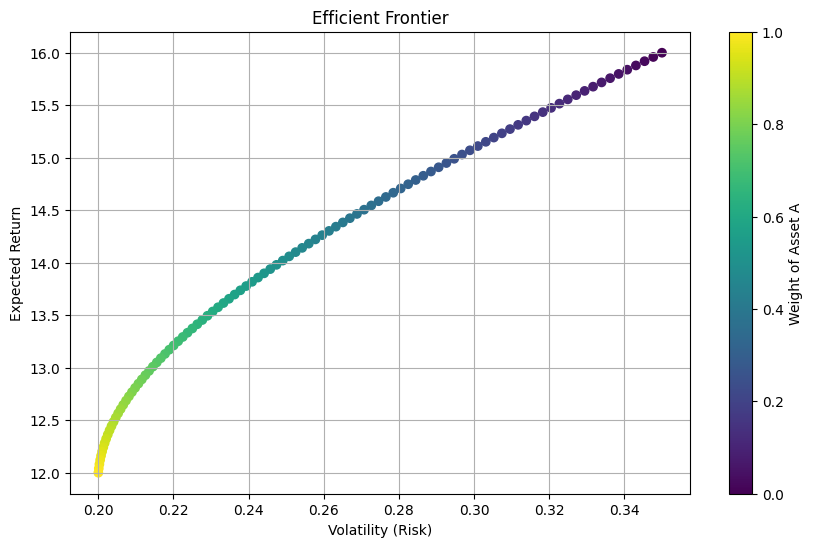

In [11]:
# Visualize Efficient Frontier
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(risk_ab, exp_return_ab, c=w_ai, cmap='viridis')
plt.colorbar(label='Weight of Asset A')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

Each of the dots in the efficient frontier represents different mixes of a portfolio.

**Sharpe Ratio**

One thing that we can look at in order to think about the risk-return trade-off is something known as the Sharpe ratio, which is defined as the expected return minus the risk-free rate over the standard deviation. The difference is there as we are not interested in just how much we get back but how much we get back above the risk-free rate.

Sharpe ratio is the measure of risk-adjusted return of a financial portfolio:

$$Sharpe\ ratio = \frac{E(r_p) - r_f}{\sigma_p}$$

where,

$E(r_p)$ is expected return of a portfolio

$r_f$ is risk-free return

$\sigma_p$ is standard deviation of the portfolio returns

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

The greater a portfolio's Sharpe ratio, the better its risk-adjusted performance.

***Risky Assets versus Risk-Free Assets***

A **risky asset is one for which the return that will be realized in the future is uncertain**. For example, suppose an investor purchases the stock of Merck today and plans to hold the stock for one year. At the time the investor purchases the stock, he or she does not know what return will be realized. The return will depend on the price of Merck stock one year from now and the dividends that the company pays during the year. Thus, the pharmaceutical stock, and indeed the stock of all companies, is a risky asset.

There are **assets**, however, **for which the return that will be realized in the future is known with certainty today. Such assets are referred to as risk-free or riskless assets**. The risk-free asset is commonly defined as short-term obligations of the U.S. government. For example, if an investor buys a U.S. government security that matures in one year and plans to hold that security for one year, then there is no uncertainty about the return that will be realized. The investor knows that in one year, the maturity date of the security, the government will pay a specific amount to retire the debt.

Now let's do a practice calculation on the Sharpe ratio.

**Example 4:** Let us consider an investment in a two asset portfolio.

* Asset A - 12% return with 20% standard deviation
* Asset B - 16% return with 35% standard deviation

The correlation between the returns on the two assets is 0.6.

Given 10000, let us invest 6000 in Asset A and 4000 in Asset B.

We've calculated the expected return to be 13.6 with a portfolio variance of 0.05416. Let's assume for now the risk-free rate to be 0, and calculate the Sharpe ratio.

In [12]:
# Expected return
E_r = 13.6/100
# Volatility/risk
var_p = 0.05416
# Risk-free rate
r_f = 0
# Sharpe ratio
# YOUR CODE HERE
Sh_r = (E_r - r_f) / var_p
print(Sh_r)

2.511078286558346


### Portfolio Weights

The weights of a portfolio are a percentage of the composition of a particular holding in a portfolio in whatever unit of currency we are using. The degree of risk reduction depends upon the weights in the portfolio. So if we have two assets, one is very risky and one is not so risky, if we put a lot of money in the risky asset, then the risk of a portfolio intuitively would go up. And likewise, if we put all of the money in the safe asset, the risk goes down. So we need to figure out what are the optimal weights in the portfolio.

**How to find the optimal weight?**

The efficient frontier represents the best combination of assets in order to get the best expected returns while considering risk. And there are two ways that we can think about this problem,

* we can hold the expected return fixed and try to find the lowest possible amount of risk and find that portfolio, or

* find a portfolio that gives us the highest return given some level of risk.

**Shape of the Efficient Frontier driven by the correlation**

The volatility of the portfolio is given by:

$$V_p = (w_a^2 * \sigma_a^2) + (w_b^2 * \sigma_b^2) + (2 * \rho_{a,b} * \sigma_a * \sigma_b * w_a * w_b)$$

In the formula, it is the $\rho_{a,b}$ term that helps to drive the shape of the efficient frontier.

Let's see an example of how the correlation between the assets affects the shape of the frontier.

**Example 5:** Let us consider an investment in a two asset portfolio.

* Asset A - 12% return with 20% standard deviation
* Asset B - 16% return with 35% standard deviation

Visualize the efficient frontier for this portfolio with the correlation between the returns on the two assets as

* $\rho$ = -1,
* $\rho$ = -0.5,
* $\rho$ = 0, and
* $\rho$ = 1.

In [13]:
# Create a function to plot efficient frontier

def plot_efficient_frontier(ax=None, r_a = 12, r_b = 16, sd_a = 0.20, sd_b = 0.35, rho_ab = 0.6):
    # Possible values for weight of Asset A
    w_ai = np.linspace(0, 1, 100)
    exp_return = list()
    risk = list()

    for w_a in w_ai:
        # Expected return
        # YOUR CODE HERE
        ex_return = (w_a * r_a) + ((1-w_a) * r_b)
        exp_return.append(ex_return)


        # Volatility/risk of portfolio
        # YOUR CODE HERE
        risk_p = np.sqrt((w_a**2 * sd_a**2) + ((1-w_a)**2 * sd_b**2) + (2 * rho_ab * sd_a * sd_b * w_a * (1-w_a)))
        risk.append(risk_p)


    risk = np.array(risk)
    exp_return = np.array(exp_return)

    if ax is None:
        plt.figure(figsize=(10, 6))
        plt.scatter(risk, exp_return, c=w_ai, cmap='viridis')
        plt.colorbar(label='Weight of Asset A')
        plt.xlabel('Volatility (Risk)')
        plt.ylabel('Expected Return')
        plt.title(f'Efficient Frontier (Correlation = {rho_ab})')
        plt.grid(True)
        plt.show()
    else:
        ax.scatter(risk, exp_return, label=f'Correlation = {rho_ab}', c=w_ai, cmap='viridis')
        ax.set_xlabel('Volatility (Risk)')
        ax.set_ylabel('Expected Return')
        ax.set_title('Efficient Frontier for Different Correlations')
        ax.grid(True)
        ax.legend()

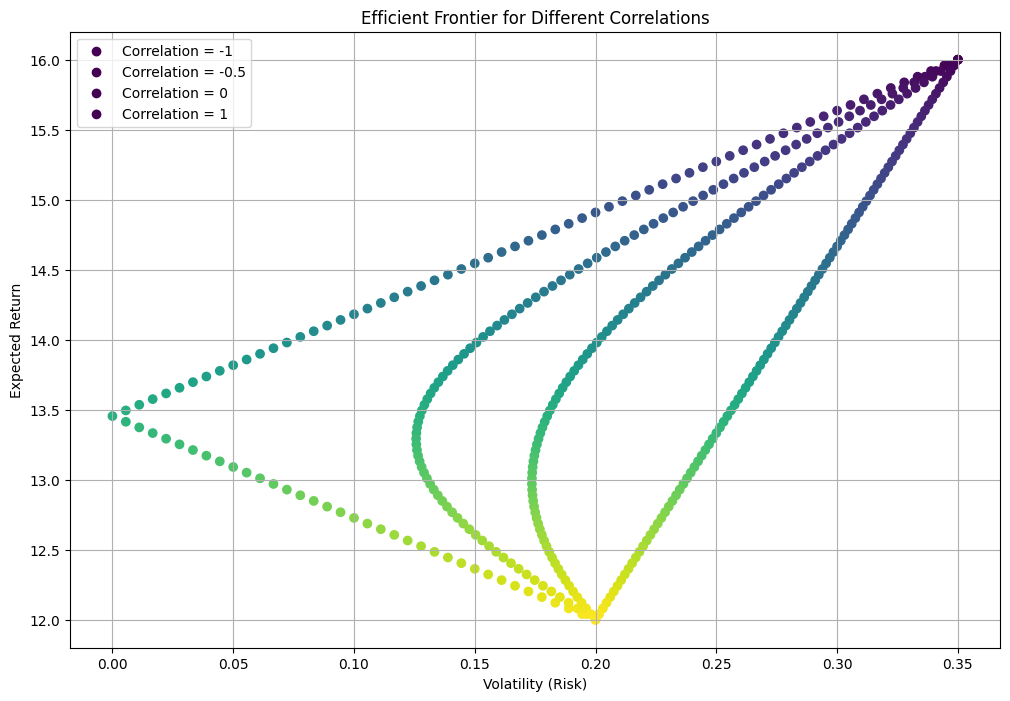

In [14]:
# Visualize efficient frontier for different correlation
# YOUR CODE HERE
correlations = [-1, -0.5, 0, 1]

plt.figure(figsize=(12, 8))
ax = plt.gca()

for rho in correlations:
    plot_efficient_frontier(ax=ax, rho_ab=rho)

plt.show()

From the above plots, we can see four graphs of the efficient frontier trying to illustrate the relationship between the correlation and the shape of the curve.

* At the bottom right-hand quadrant, the two assets are perfectly correlated, showing a straight line.
* At the top left-hand quadrant, the assets are perfectly negatively correlated. We have this wedge-shaped here, and that represents some sort of arbitrage opportunity.
* More generally we'll see something that looks like the ones with $\rho = -0.5$ and $\rho = 0$.

As we play with different values of $\rho$, we'll see that the efficient frontier will be the straight line, then it will start to bow out and keep bowing out until it finally reaches a point and turns into a wedge shape.

**Minimum Variance Portfolio**

* This indicates a portfolio, comprised of risky assets, with the least amount of variance (risk).

* The minimum variance portfolio can be pointed out on the efficient frontier.

* The optimal minimum variance portfolio will decrease overall volatility with each investment added to it, even if the individual investments are volatile in nature.

**Capital Allocation Line**

One thing investors often do is to combine the risky assets with something that's risk-free like a government bond and that helps to reduce the overall risk. So a complete portfolio is defined as a combination of risky asset portfolio, with return $R_p$, and the risk-free asset, with return $R_f$. So the optimal risky portfolio is found at a point where the capital allocation line is tangent to the efficient frontier.

Let's look at the **equation for the capital allocation line**. The expected return of the complete portfolio is given as:

$$E(r_c) = r_f + S_p \sigma_c$$

where $r_c$ is the expected return of the complete portfolio of the risk-free asset and risky portfolio,

$S_p$ is the Sharpe ratio of the risky portfolio.

$\sigma_c$ is the standard deviation of the complete portfolio, which is given by $\sigma_c = w_p * \sigma_p + w_f * \sigma_f$

$w_p$ is the allocation in the risky portfolio and $w_f$ in the risk-free asset.

Since the risk-free rate has a zero standard deviation, it's risk-free, there is no risk, $\sigma_f = 0$, we have $\sigma_c = w_P * \sigma_P$.

**Tangency Portfolio**

The point where the capital allocation line touches the efficient frontier is known as the tangency portfolio. That is the point on the efficient frontier which has the greatest Sharpe ratio. The Sharpe ratio is the ratio of the expected returns over the risk. So we want more returns, less risk, and the bigger that number the better. It's geometrically represented by the slope of that line.

The capital allocation line makes up a combination of risk-free assets and a risky portfolio. The point of tangency represents the point where the investor may completely invest in a risky portfolio.

Let's look at a geometric representation.

**Example 6:** Let us consider an investment in a two asset portfolio.

* Asset A - 12% return with 20% standard deviation
* Asset B - 16% return with 35% standard deviation

The correlation between the returns on the two assets is 0.6.

Consider 12% as risk-free return, visualize the capital allocation line, minimum variance portfolio, and tangency portfolio.

In [15]:
# Risk-free return
rf = 12

# Sharpe ratios for different weight combinations
# YOUR CODE HERE
sharpe_ratios = (exp_return_ab - rf) / risk_ab

# Highest sharpe ratio
# YOUR CODE HERE
highest_sharpe_ratio = np.max(sharpe_ratios)
# Index of the tangency portfolio
tangency_portfolio_index = np.argmax(sharpe_ratios)

In [16]:
# Capital allocation line equation
x = risk_ab
# YOUR CODE HERE
# The capital allocation line passes through the risk-free rate on the y-axis (risk = 0)
# and is tangent to the efficient frontier at the tangency portfolio.
# The slope of the CAL is the Sharpe ratio of the tangency portfolio.
y_cal = rf + highest_sharpe_ratio * x

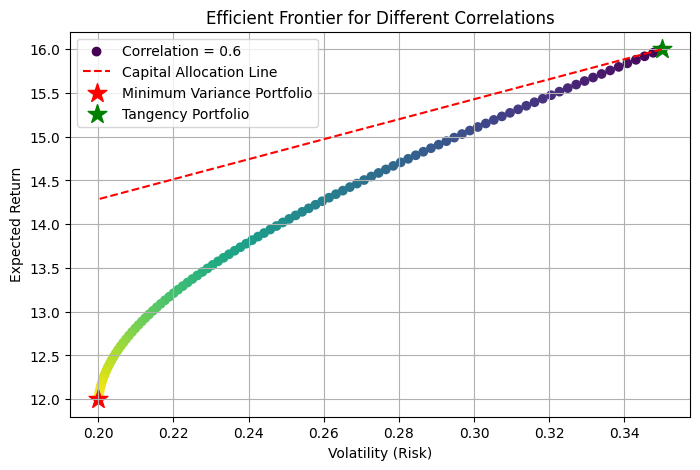

In [17]:
# Efficient frontier
fig, ax = plt.subplots(1, figsize=(8,5))
plot_efficient_frontier(ax=ax)

# Capital allocation line
# YOUR CODE HERE
ax.plot(x, y_cal, linestyle='--', color='red', label='Capital Allocation Line')

# Minimum variance portfolio
# YOUR CODE HERE
min_variance_index = np.argmin(risk_ab)
ax.scatter(risk_ab[min_variance_index], exp_return_ab[min_variance_index], color='red', marker='*', s=200, label='Minimum Variance Portfolio')


# Tangency portfolio
# YOUR CODE HERE
ax.scatter(risk_ab[tangency_portfolio_index], exp_return_ab[tangency_portfolio_index], color='green', marker='*', s=200, label='Tangency Portfolio')

ax.legend()
plt.show()

From the above plot, we can see the efficient frontier along with capital allocation line, minimum variance portfolio (**red star**), and tangency portfolio (**green star**).

We will learn more about these topics in the next assignment i.e, Module5 Assignment8.

### Please answer the questions below to complete the experiment:




In [18]:
#@title If a portfolio contained five equally weighted assets with expected returns of 4, 6, 10, 12 and 14%, the portfolio's expected return would be: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "9.2%" #@param ["", "8.5%", "10.8%", "9.2%"]

In [19]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [20]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = ".." #@param {type:"string"}

In [21]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [22]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [23]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [24]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 6773
Date of submission:  21 Jul 2025
Time of submission:  22:28:08
View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions
